In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("dog_rates_tweets.csv")
data.dtypes

id             int64
created_at    object
text          object
dtype: object

In [3]:
# read csv file containing tweets 
# parse datetime_values druing reading file 
data = pd.read_csv("dog_rates_tweets.csv", parse_dates=['created_at'])
data.dtypes

id             int64
created_at    object
text          object
dtype: object

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# acquiring rating using pandas lib 
# filter rows that does not contain ratings
filtered_data = data[data['text'].str.contains(r'(\d+(\.\d+)?)/10')]      # uses re.search()
# extract rating as float & and add to df as col
filtered_data['rating'] = filtered_data['text'].str.extract(r'(\d+(\.\d+)?)/10')[0].astype(float)       # uses re.match()
# filter rows that contain invalid rating such as greater than 25/10
filtered_data = filtered_data[filtered_data['rating'] <= 25]
filtered_data.head()

,id,created_at,text,rating
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0


In [6]:
import matplotlib.pyplot as plt

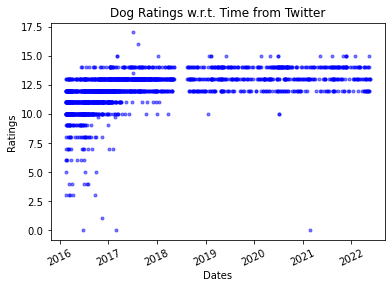

In [7]:
# plot ratings vs. dates 
plt.plot(filtered_data['created_at'], filtered_data['rating'], 'b.', alpha=0.5)
# add title and label the axes
plt.title("Dog Ratings w.r.t. Time from Twitter")
plt.xlabel("Dates")
plt.ylabel("Ratings")
plt.xticks(rotation=25)
plt.show()

In [8]:
# create function to generate timestamp from series 
def to_timestamp(t):
    return t.timestamp()

# make a copy of data 
data2 = filtered_data
# add timestamp col to new df
data2['timestamp'] = data2['created_at'].apply(to_timestamp)
data2.head()

,id,created_at,text,rating,timestamp
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525935e+09
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525822e+09
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525760e+09
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525419e+09
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525310e+09


In [9]:
from scipy import stats

In [10]:
# compute linear regression of x=timestamp and y=rating
result = stats.linregress(data2['timestamp'], data2['rating'])
?result

In [11]:
# make prediction using LR model and add col to df
data2['prediction'] = result.slope*data2['timestamp'] + result.intercept
data2

,id,created_at,text,rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525935e+09,12.303514
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525822e+09,12.301817
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525760e+09,12.300888
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525419e+09,12.295770
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525310e+09,12.294144
...,...,...,...,...,...,...
14885,1275493485085245440,2020-06-23 18:18:39+00:00,This is Ruth. She was spotted at a rally doing...,14.0,1.592936e+09,13.308733
14895,1275102054608855040,2020-06-22 16:23:14+00:00,This is Narcos. He is very angry with you. The...,13.0,1.592843e+09,13.307333
14896,1274821722584125442,2020-06-21 21:49:18+00:00,@PatrickKenneyMD omg i’d say 13/10 but i’d hat...,13.0,1.592776e+09,13.306330
14906,1273774320519483392,2020-06-19 00:27:18+00:00,This is Oakley. He’s on his way home for the f...,12.0,1.592526e+09,13.302583


In [12]:
# display model's fit and intercept 
result.slope, result.intercept

(1.500295334373573e-08, -10.590016533606498)

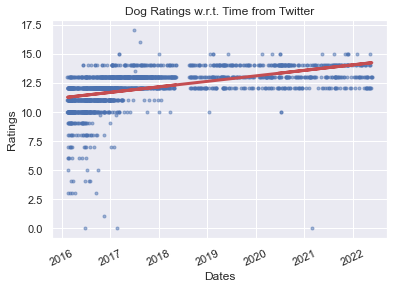

In [32]:
# plot ratings (original value) vs. dates
plt.plot(filtered_data['created_at'], filtered_data['rating'], 'b.', alpha=0.5)
# plot best fit line using model's prediction
plt.plot(data2['created_at'], data2['prediction'], 'r-', linewidth=3)
# add title and label the axes
plt.title("Dog Ratings w.r.t. Time from Twitter")
plt.xlabel("Dates")
plt.ylabel("Ratings")
plt.xticks(rotation=25)
plt.show()

In [14]:
# display model's p-value
result.pvalue

2.536058725134726e-127

##### Hypothesis Testing:

Let, $H_0: \beta_1 = 0$ vs. $H_1: \beta_1 \neq 0$ <br/>
Null hypothesis indicates there is no replationship between y and x and rejection of null indicates that there is a relationship. 


Since, the p-value < 0.05 


Therefore, we reject the null hypothsis at o.o5 level of significance. And conclude that the relationship between Ratings and Dates is significant. That is, the ratings given by this Twitter account been (increasingly/positively) changing over time.

Assumptions:<br/>
a. Residuals are nornally distributed with a mean of zero and have a constant variance<br/>
b. Residuals are independent of each other<br/>

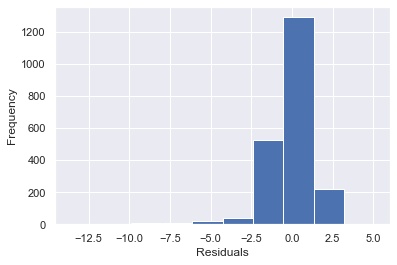

In [35]:
# plot the residuals 
residuals = (data2['rating'] - data2['prediction'])
plt.hist(residuals)
plt.xlabel("Residuals")
plt.ylabel("Frequency");


The distribution of residuals are left-skewed, however, we can see that this occurs due to having lower ratings and outliers in the year between 2016 and 2017. Therefore, we can use this model for prediction or transform the data in some form to make the residuals normal, for more accurate predictions. 